In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/uniform_distribution_south_crops.csv")

In [ ]:
df.columns

Index(['ph', 'rainfall', 'sowing_temp', 'harvesting_temp', 'P', 'N', 'K',
       'crop'],
      dtype='object')

In [ ]:
df['crop'].unique()

array(['cowpea_lobia', 'rapeseed_mustard', 'safflower',
       'peas_beans_pulses', 'linseed', 'wheat', 'urad', 'turmeric',
       'sunflower', 'sugarcane', 'rice', 'ragi', 'potato', 'onion',
       'moong_green_gram', 'maize_r', 'maize_k', 'jowar', 'groundnut',
       'gram', 'dry_chillies', 'cotton_lint', 'coriander', 'bajra',
       'arhar_tur'], dtype=object)

In [ ]:
c=df.crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['crop']=c.cat.codes

In [ ]:
targets.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
targets.values()

dict_values(['arhar_tur', 'bajra', 'coriander', 'cotton_lint', 'cowpea_lobia', 'dry_chillies', 'gram', 'groundnut', 'jowar', 'linseed', 'maize_k', 'maize_r', 'moong_green_gram', 'onion', 'peas_beans_pulses', 'potato', 'ragi', 'rapeseed_mustard', 'rice', 'safflower', 'sugarcane', 'sunflower', 'turmeric', 'urad', 'wheat'])

In [ ]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (1500, 7)
Outputs shape  (1500,)


In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler

x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# we must apply the scaling to the test set as well that we are computing for the training set
x_test = scaler.transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 7)
(300, 7)
(1200,)
(300,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,25)
y_test=to_categorical(y_test,25)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(1200, 25)
(300, 25)


In [ ]:
from keras.models import Sequential  #Models->Layers->modules 
from keras.layers import Dense       #Keras is a wrapper to tenorflow as a book
input_size=7
output_size=25
ann_model=Sequential()
ann_model.add(Dense(units=64,activation='sigmoid',input_shape=(input_size,)))
ann_model.add(Dense(units=output_size,activation='softmax'))

In [ ]:
ann_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                512       
                                                                 
 dense_7 (Dense)             (None, 25)                1625      
                                                                 
Total params: 2,137
Trainable params: 2,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'],
                  steps_per_execution=10)
#Here we are configuring/assigning parameters of the model for training

In [ ]:
#below block code is throwing some error due to mismatch so need to run this code
tf.config.experimental_run_functions_eagerly(True)

In [ ]:
model_results=ann_model.fit(x_train,y_train,
              epochs=70,
              batch_size=30,
              validation_split=0.2)

Epoch 1/70


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 1s 30ms/step - loss: 3.2800 - categorical_accuracy: 0.0406 - val_loss: 3.2420 - val_categorical_accuracy: 0.0292
Epoch 2/70
32/32 [==============================] - 1s 30ms/step - loss: 3.2226 - categorical_accuracy: 0.0167 - val_loss: 3.2231 - val_categorical_accuracy: 0.0375
Epoch 3/70
32/32 [==============================] - 1s 37ms/step - loss: 3.2084 - categorical_accuracy: 0.0719 - val_loss: 3.2094 - val_categorical_accuracy: 0.0542
Epoch 4/70
32/32 [==============================] - 1s 37ms/step - loss: 3.1979 - categorical_accuracy: 0.0990 - val_loss: 3.2037 - val_categorical_accuracy: 0.0500
Epoch 5/70
32/32 [==============================] - 1s 37ms/step - loss: 3.1866 - categorical_accuracy: 0.0583 - val_loss: 3.1911 - val_categorical_accuracy: 0.0458
Epoch 6/70
32/32 [==============================] - 1s 28ms/step - loss: 3.1744 - categorical_accuracy: 0.1344 - val_loss: 3.1793 - val_categorical_accuracy: 0.1083
Epoch 7/70
32/32 [===

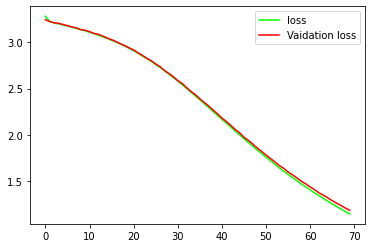

In [ ]:
plt.plot(model_results.history['loss'],color="#00ff00",label="loss")
plt.plot(model_results.history['val_loss'],color="#ff0000",label="Vaidation loss")
plt.legend() #adds axis label
plt.show()

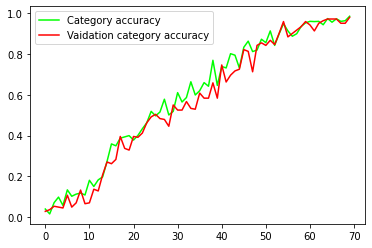

In [ ]:
plt.plot(model_results.history['categorical_accuracy'],color="#00ff00",label="Category accuracy")
plt.plot(model_results.history['val_categorical_accuracy'],color="#ff0000",label="Vaidation category accuracy")
plt.legend() #adds axis label
plt.show()

In [ ]:
import pickle
#saving the model
pickle.dump(ann_model, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann.pkl", "wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-15 10:59:46           64
variables.h5                                   2023-03-15 10:59:46        45284
config.json                                    2023-03-15 10:59:46         1422


In [ ]:
# function to return key for any value 
def get_key(val): 
    for key, value in targets.items(): 
         if (val == key): 
             return value 

In [ ]:
targets

{0: 'arhar_tur',
 1: 'bajra',
 2: 'coriander',
 3: 'cotton_lint',
 4: 'cowpea_lobia',
 5: 'dry_chillies',
 6: 'gram',
 7: 'groundnut',
 8: 'jowar',
 9: 'linseed',
 10: 'maize_k',
 11: 'maize_r',
 12: 'moong_green_gram',
 13: 'onion',
 14: 'peas_beans_pulses',
 15: 'potato',
 16: 'ragi',
 17: 'rapeseed_mustard',
 18: 'rice',
 19: 'safflower',
 20: 'sugarcane',
 21: 'sunflower',
 22: 'turmeric',
 23: 'urad',
 24: 'wheat'}

In [ ]:
for key,value in targets.items():
   print(key)      #Output: message
   print(value)

0
arhar_tur
1
bajra
2
coriander
3
cotton_lint
4
cowpea_lobia
5
dry_chillies
6
gram
7
groundnut
8
jowar
9
linseed
10
maize_k
11
maize_r
12
moong_green_gram
13
onion
14
peas_beans_pulses
15
potato
16
ragi
17
rapeseed_mustard
18
rice
19
safflower
20
sugarcane
21
sunflower
22
turmeric
23
urad
24
wheat


In [ ]:
print(type(y_test[0][0]))

<class 'numpy.ndarray'>


In [ ]:

loaded_model=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann.pkl','rb'))
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl','rb'))
data =loaded_scale.transform( np.array([[	6.938392,	99.582467,	33.448888	,20.369623	,14.880316,	25.945969	,12.508710	]]))
prediction = loaded_model.predict(data)
code=np.argmax(prediction)
print("Code is ",code)
print(get_key(code))

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-15 10:59:46           64
variables.h5                                   2023-03-15 10:59:46        45284
config.json                                    2023-03-15 10:59:46         1422
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
1/1 [==============================] - 0s 78ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Code is  16
ragi


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

y_pred_ann = np.round(loaded_model.predict(x_test)).astype(int)

print('Results for ann Model')

matrix_plot=confusion_matrix(y_test, y_pred_ann)
# disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
#                              display_labels=bnb.classes_)
# disp.plot()

print(classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 0s 17ms/step
Results for ann Model


ValueError: ignored